# Modelo Gradient Boosting - TfidfVectorizer

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset_final_actualizacion_mayus2.csv')
df

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target
0,ElDiario.es,https://www.eldiario.es/politica/pp-recupera-l...,2023-07-11,El PP se recupera ligeramente pero sigue sin o...,La estimación de escaños no se mueve en la enc...,El partido popular se recupera muy ligeramente...,politica,0
1,ElDiario.es,https://www.eldiario.es/politica/58-ciudadanos...,2023-07-11,Un 58% de los ciudadanos critican los pactos c...,"El 17,8% de quienes apuestan por Feijóo ven “m...",El PP ha necesitado a Vox para recuperar buena...,politica,0
2,ElDiario.es,https://www.eldiario.es/politica/diputado-ayus...,2023-07-11,Un diputado de Ayuso reúne a un grupo de vícti...,Daniel Portero trata con urgencia de contrarre...,El diputado del PP en la Asamblea de Madrid Da...,politica,0
3,ElDiario.es,https://www.eldiario.es/andalucia/almeria/psoe...,2023-07-11,El PSOE de Mójacar recurre ante el Constitucio...,"Ya con nuevo alcalde del PP, los socialistas r...",Mojácar retomó el ritmo político con la procla...,andalucia,0
4,ElDiario.es,https://www.eldiario.es/castilla-la-mancha/pol...,2023-07-11,La exalcaldesa de Toledo pide a Feijóo que fir...,"La socialista, también número dos al Congreso,...",La exalcaldesa de Toledo y 'número dos' de la ...,castilla-la-mancha,0
...,...,...,...,...,...,...,...,...
4974,HayNoticia.es,https://haynoticia.es/una-empresa-catalana-tri...,2018-11-06,Una empresa catalana triunfa con su papel higi...,NaN,La empresa catalana Banys Nous de Barcelona es...,curiosidades,1
4975,HayNoticia.es,https://haynoticia.es/hospitalizado-tras-inten...,2018-10-31,Hospitalizado tras intentar sacarse una muela ...,NaN,Sucedió el pasado lunes poco después de las 20...,curiosidades,1
4976,HayNoticia.es,https://haynoticia.es/lleva-300-bolsas-de-plas...,2018-10-30,Lleva 300 bolsas de plástico a Mercadona para ...,NaN,Un joven ha sido noticia ayer tras presentarse...,curiosidades,1
4977,HayNoticia.es,https://haynoticia.es/la-dgt-multara-a-los-con...,2018-10-28,La DGT multará a los conductores que no hayan ...,NaN,Este domingo nos ha tocado hacer por segunda v...,curiosidades,1


In [4]:
df.Target.value_counts()

0    2506
1    2473
Name: Target, dtype: int64

In [5]:
df["Texto"] = df.Titular + " " + df.Cuerpo
df.head()

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target,Texto
0,ElDiario.es,https://www.eldiario.es/politica/pp-recupera-l...,2023-07-11,El PP se recupera ligeramente pero sigue sin o...,La estimación de escaños no se mueve en la enc...,El partido popular se recupera muy ligeramente...,politica,0,El PP se recupera ligeramente pero sigue sin o...
1,ElDiario.es,https://www.eldiario.es/politica/58-ciudadanos...,2023-07-11,Un 58% de los ciudadanos critican los pactos c...,"El 17,8% de quienes apuestan por Feijóo ven “m...",El PP ha necesitado a Vox para recuperar buena...,politica,0,Un 58% de los ciudadanos critican los pactos c...
2,ElDiario.es,https://www.eldiario.es/politica/diputado-ayus...,2023-07-11,Un diputado de Ayuso reúne a un grupo de vícti...,Daniel Portero trata con urgencia de contrarre...,El diputado del PP en la Asamblea de Madrid Da...,politica,0,Un diputado de Ayuso reúne a un grupo de vícti...
3,ElDiario.es,https://www.eldiario.es/andalucia/almeria/psoe...,2023-07-11,El PSOE de Mójacar recurre ante el Constitucio...,"Ya con nuevo alcalde del PP, los socialistas r...",Mojácar retomó el ritmo político con la procla...,andalucia,0,El PSOE de Mójacar recurre ante el Constitucio...
4,ElDiario.es,https://www.eldiario.es/castilla-la-mancha/pol...,2023-07-11,La exalcaldesa de Toledo pide a Feijóo que fir...,"La socialista, también número dos al Congreso,...",La exalcaldesa de Toledo y 'número dos' de la ...,castilla-la-mancha,0,La exalcaldesa de Toledo pide a Feijóo que fir...


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["Texto"], 
                                                  df["Target"], 
                                                  test_size=0.3, 
                                                  stratify=df["Target"],
                                                  random_state=42)

In [8]:
df["Texto"].isna().any().sum()

0

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
spanish_stop_words = ['000', '10', '11','110','130','newsletter']
vectorizer = TfidfVectorizer(max_features=10000, stop_words=stopwords+spanish_stop_words)
X_train_vect = vectorizer.fit_transform(X_train)

In [10]:
vectorizer.get_feature_names_out()

array(['05', '07', '100', ..., 'únicos', 'útil', 'útiles'], dtype=object)

In [11]:
X_test_vect = vectorizer.transform(X_test)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.1,
                                  n_estimators=100,
                                  tol=0.0001, #parametros propios del boosting, a partir de aquí del arbol
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,
                                  max_depth=3,
                                  random_state=None,
                                  max_features=None)
clf.fit(X_train_vect, y_train)
y_pred = clf.predict(X_test_vect)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy Gradient Boosting:", accuracy)
print("Classification Report:\n", report)

Accuracy Gradient Boosting: 0.9129852744310576
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       752
           1       0.88      0.96      0.92       742

    accuracy                           0.91      1494
   macro avg       0.92      0.91      0.91      1494
weighted avg       0.92      0.91      0.91      1494



In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Confusion Matrix


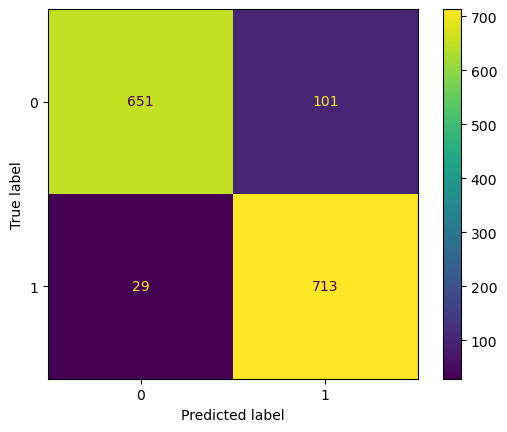

In [16]:
cfm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()